<a href="https://colab.research.google.com/github/phatt-23/ZSU/blob/master/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📋 Data preparation**

* Every project must include description of the dataset features and a brief exploration analysis so you get to know the data you are working with
* 📒Describe what operations you are performing for each of the features
    * e.g. No operation needed, dropping the feature, Min-Max scaling, One-hot encoding, Categorization (numeric -> categorical) etc.
    * You can even try to experiment with many different preprocession operations and you will see what works the best - this is totally up to you!
* 🔎 What model performance metrics have you decided to use?
    * e.g. Accuracy, Precision, Recall, F1-score etc.
    📒 State which one of the scores is the most important from your point of view given the class balance, task, ... in a Markdown cell!

# **🎯 Additional requirements**

* 🎯 Try at least 3 different classification algorithms
    * 🌳 Decision tree is a mandatory one
    * Other algorithm choices depends solely on you - you can find many different algorithms in the scikit-learn docs.
    * We can recommend the Multi-layer Perceptron (MLP), Random Forest, AdaBoost, k-Nearest Neighbors or Naive Bayes.
    * Check blog posts, book chapters or Youtube videos about the algoritmhs you have chosen so you have a basic knowledge about its key concepts.
    * 💡 You know some of them already from the lectures 🙂
* k-Fold cross validation will be used for the algoritmh performance evaluation
    * e.g. 5-fold, 10-fold, ...
    * 📒 State if you used standard or stratified version and why in a Markdown cell.
* 🚀 Your project must include hyper-parameters tuning
    * Given the fundamental knowledge about the selected algorithms select suitable parameters for the tuning (See scikit-learn docs for details).
    * Do at least 15 experiments with different values of selected parameters in total.
    * 💡 This part can be imbalanced! You don't have to try 5 different setting for each of algorithm - You can focus on a single algorithm more however at least 2 parameter settings have to be tried for every algorithm e.g. 2 for Decision Tree, 2 for Random Forest, 11 for MLP
    * 📊 Create a table with header like | Algorithm | Parameters | Metrics score | for you experiments results
    * 📒 Explain the parameters effect on the model performance in a Markdown cell

# **📌 General Requirements**

* ✅ Mandatory part of every project is a summary at the end in which you summarize the most interesting insight obtained.
* Upload a Jupyter Notebook with descriptions or PDF report + source code
* 💡 Estimated time for the project is 5-10h, this value heavily depends on your skill, but you can use it as a guidance for a project size.



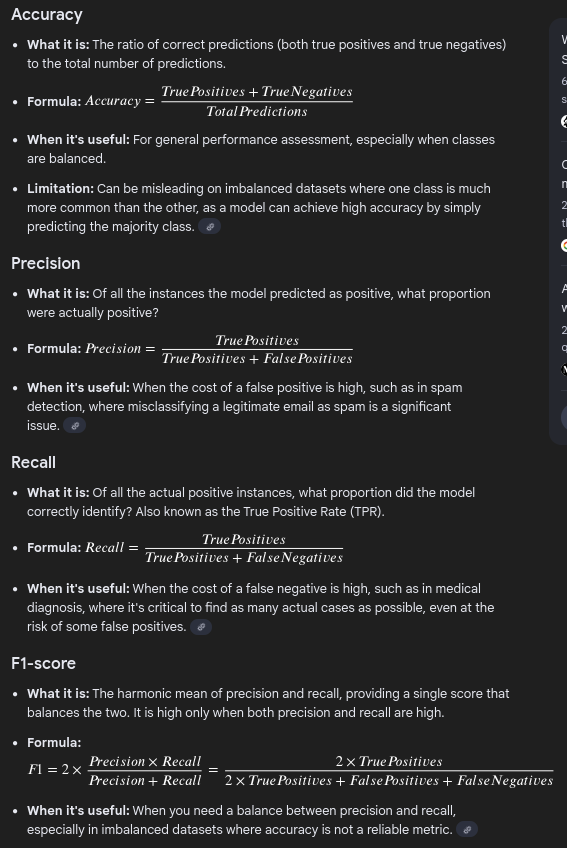

# **2️⃣ Adult Income Prediction**

- Scenario: Predict whether income exceeds $50K/year based on census data.

- Classic dataset for binary classification tasks. Analyze demographic and employment factors that influence income levels in the population.

- Target Variable: class (>50K or <=50K)

- Key Features: Age, Workclass, Education, Marital Status, Occupation, Race, Sex, Capital Gain/Loss, Hours per Week, Native Country

- 💡 Note: The .data files are plain CSV/text files


# **Imports**

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import (
    DecisionTreeClassifier,
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    KFold,
)

from sklearn.ensemble import (
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
)

# **Load Data**

In [152]:
df_full = pd.read_csv(
    'https://raw.githubusercontent.com/phatt-23/ZSU/c338d3c7e177df3de6e64920bbe8eff6665389ac/project-2/adult.csv',
    header=None,
    sep=', ',
    engine='python')
df_full.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [153]:
df_full.shape

(32561, 15)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [154]:
df_full.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Features Description**

In [155]:
df_full.columns = [
    'Age',
    'Workclass',
    'fnlwgt',
    'Education',
    'Education_Num',
    'Marital_Status',
    'Occupation',
    'Relationship',
    'Race',
    'Sex',
    'Capital_Gain',
    'Capital_Loss',
    'Hours_per_Week',
    'Native_Country',
    'Income',           # whether they have income that is greater than some fixed amount (50k)
]
df_full.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* `age`: the age of an individual
    * Integer greater than 0
* `workclass`: a general term to represent the employment status of an individual
    * Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,  Without-pay, Never-worked.
* `fnlwgt`: this is the number of people the census believes the entry represents.
    * Integer greater than 0
* `education`: the highest level of education achieved by an individual.
    * Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* `education-num`: the highest level of education achieved in numerical form.
    * Integer greater than 0
* `marital-status`: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
    * Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: the general type of occupation of an individual
    * Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship`: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all
    * Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: Descriptions of an individual’s race
    * White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: the biological sex of the individual
    * Male, female
* `capital-gain`: capital gains for an individual
    * Integer greater than or equal to 0
* `capital-loss`: capital loss for an individual
    * Integer greater than or equal to 0
* `hours-per-week`: the hours an individual has reported to work per week
    * continuous
* `native-country`: country of origin for an individual
    * United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* `the label`: whether or not an individual makes more than $50,000 annually.
    * <= 50K, >50K


# **Dropping Columns**

In [156]:
df_full = df_full.drop(columns=['fnlwgt'])
df_full.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [157]:
df_full.shape

(32561, 14)

# **Preprocess `?` values**



In [158]:
df_full.columns

Index(['Age', 'Workclass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'],
      dtype='object')

In [159]:
df_full.Age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [160]:
df_full.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Here I pressume that `?` values are missing values.

In [161]:
df_full.loc[df_full.Workclass == '?']

,Age,Workclass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


## **Check other categorical features**

In [162]:
categorical_features = df_full.describe(exclude=np.number).columns

for f in categorical_features:
    print()
    print(f'Column: {f}')
    display(df_full[f].unique())


Column: Workclass


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)


Column: Education


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)


Column: Marital_Status


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)


Column: Occupation


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)


Column: Relationship


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)


Column: Race


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)


Column: Sex


array(['Male', 'Female'], dtype=object)


Column: Native_Country


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)


Column: Income


array(['<=50K', '>50K'], dtype=object)

This comfirms that `?` does in fact mean missing data. I'm going to replace all occurences of `?` with a null value, so that i can drop them or impute them later.

In [163]:
df = df_full.copy()

for f in categorical_features:
    df[f] = df[f].apply(lambda x: np.nan if x == '?' else x)

df.shape

(32561, 14)

In [164]:
categorical_features = df.describe(exclude=np.number).columns

for f in categorical_features:
    print()
    print(f'Column: {f}')
    display(df[f].unique())


Column: Workclass


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)


Column: Education


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)


Column: Marital_Status


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)


Column: Occupation


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)


Column: Relationship


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)


Column: Race


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)


Column: Sex


array(['Male', 'Female'], dtype=object)


Column: Native_Country


array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)


Column: Income


array(['<=50K', '>50K'], dtype=object)

## **Check Missing Data**

In [165]:
df.shape

(32561, 14)

In [ ]:
df.isna().sum()

,0
Age,0
Workclass,1836
Education,0
Education_Num,0
Marital_Status,0
Occupation,1843
Relationship,0
Race,0
Sex,0
Capital_Gain,0


In [166]:
df_isna = df.isna()
df_isna.loc[(df_isna.Workclass == True)].sum()

,0
Age,0
Workclass,1836
Education,0
Education_Num,0
Marital_Status,0
Occupation,1836
Relationship,0
Race,0
Sex,0
Capital_Gain,0


In [167]:
missing_count = 1836 + 583 - 27
missing_percentage = missing_count / df.shape[0]
missing_count, missing_percentage

(2392, 0.073462117256841)

All records with missing value in Workclass have missing value in Occupation (1836). Some of these records (27) don't even have Native_Country specified.

There is 583 records with missing Native_Country.

There's 2392 records with missing values, accounting for **7.34 %** of the entire dataset.

We can afford to **drop these**.

In [168]:
df = df.dropna()
df.shape

(30162, 14)

# **Exploratory Analysis**

First I explore continuous features (with ordering).

Then I analyse non-continuous variables.

In [ ]:
display(df.columns)

print()
print('--- Numerical Features ---')
display(df.describe(include=np.number).columns)

print()
print('--- Categorical Features ---')
display(df.describe(exclude=np.number).columns)

Index(['Age', 'Workclass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'],
      dtype='object')


--- Numerical Features ---


Index(['Age', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_Week'],
      dtype='object')


--- Categorical Features ---


Index(['Workclass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_Country', 'Income'],
      dtype='object')

## **Income Distribution**

In [ ]:
df.Income.value_counts()

,count
Income,
<=50K,22654
>50K,7508


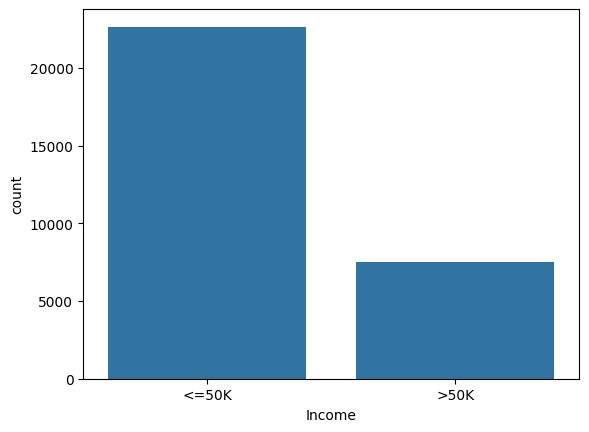

In [ ]:
sns.countplot(x=df.Income)
plt.show()

This dataset is heavily imbalanced towards those with lower income, as expected. There are more low income people than high income people.

## **Sex and Age on Income**

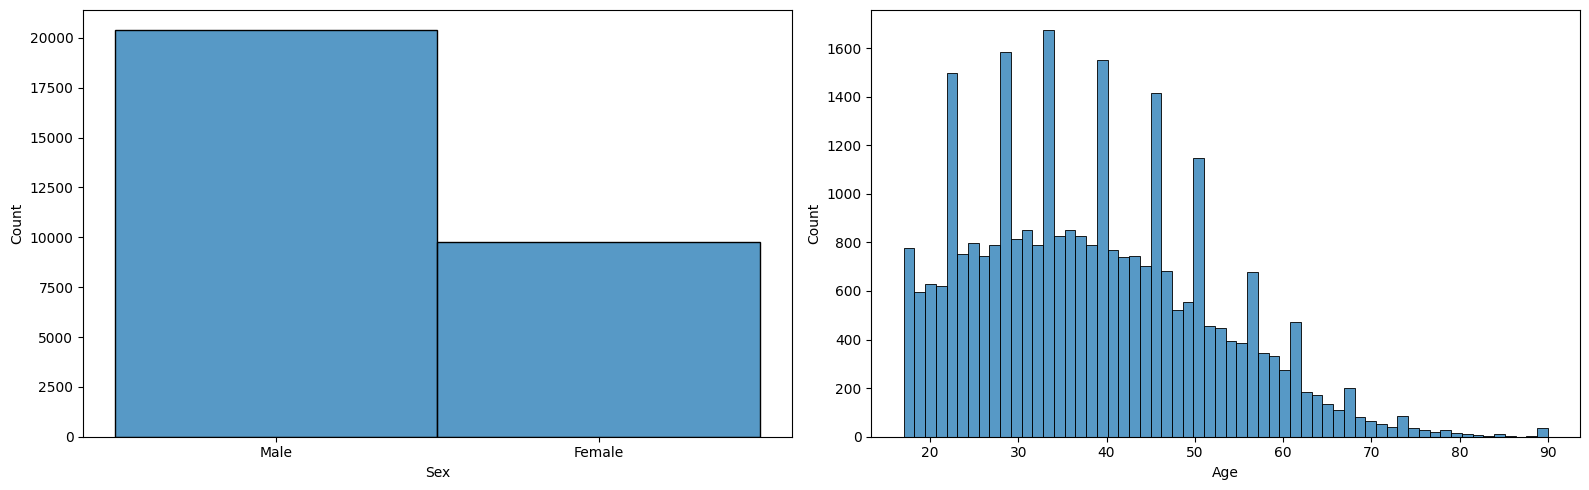

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['Sex'])

plt.subplot(1,2,2)
sns.histplot(df['Age'])

plt.tight_layout()
plt.show()

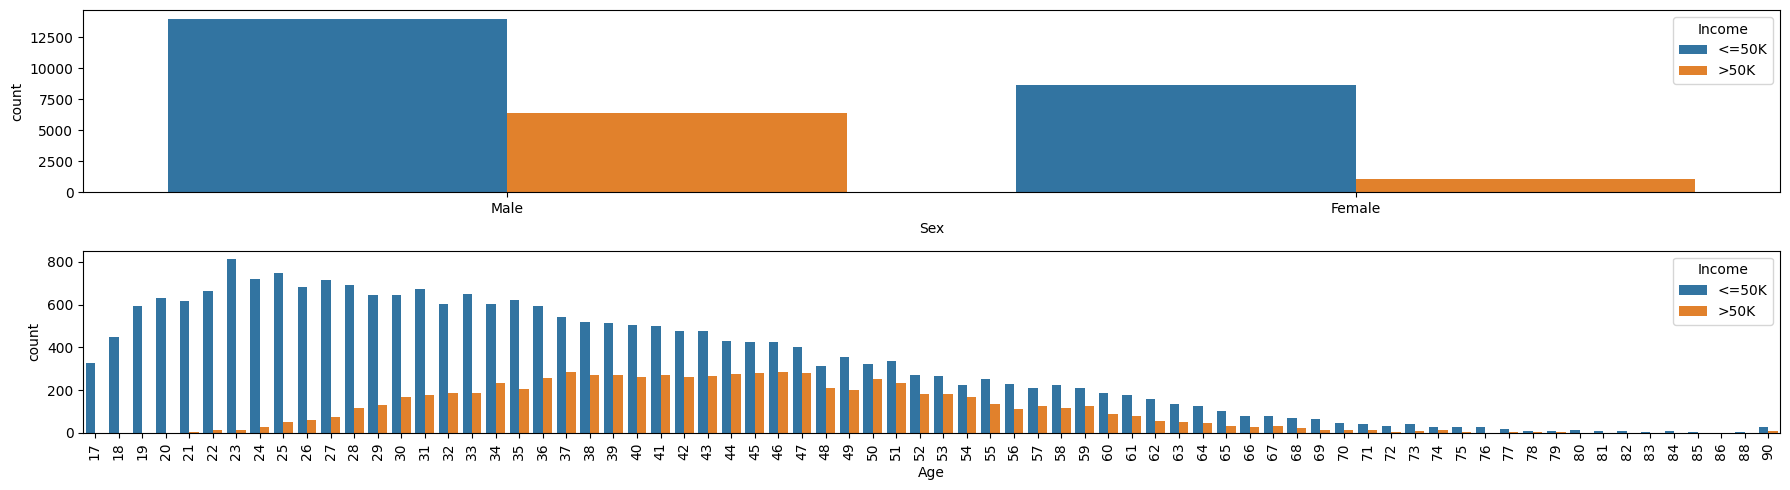

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(2,1,1)
sns.countplot(x=df['Sex'], hue=df.Income)

plt.subplot(2,1,2)
sns.countplot(x=df['Age'], hue=df.Income)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Obervations

The meadian age of higher income group is higher.

The age dist of lower income group is right left-skewed. *italicized text*

Here the correlation between age and income is quit clear. Older people usualy have higher income than the youth (the ratio).

Also the income discrepency between `Male` and `Female` is very evident too. Men outearn women. Almost half of the men have high income, whereas for women it's about 10%.

## **Education on Income**

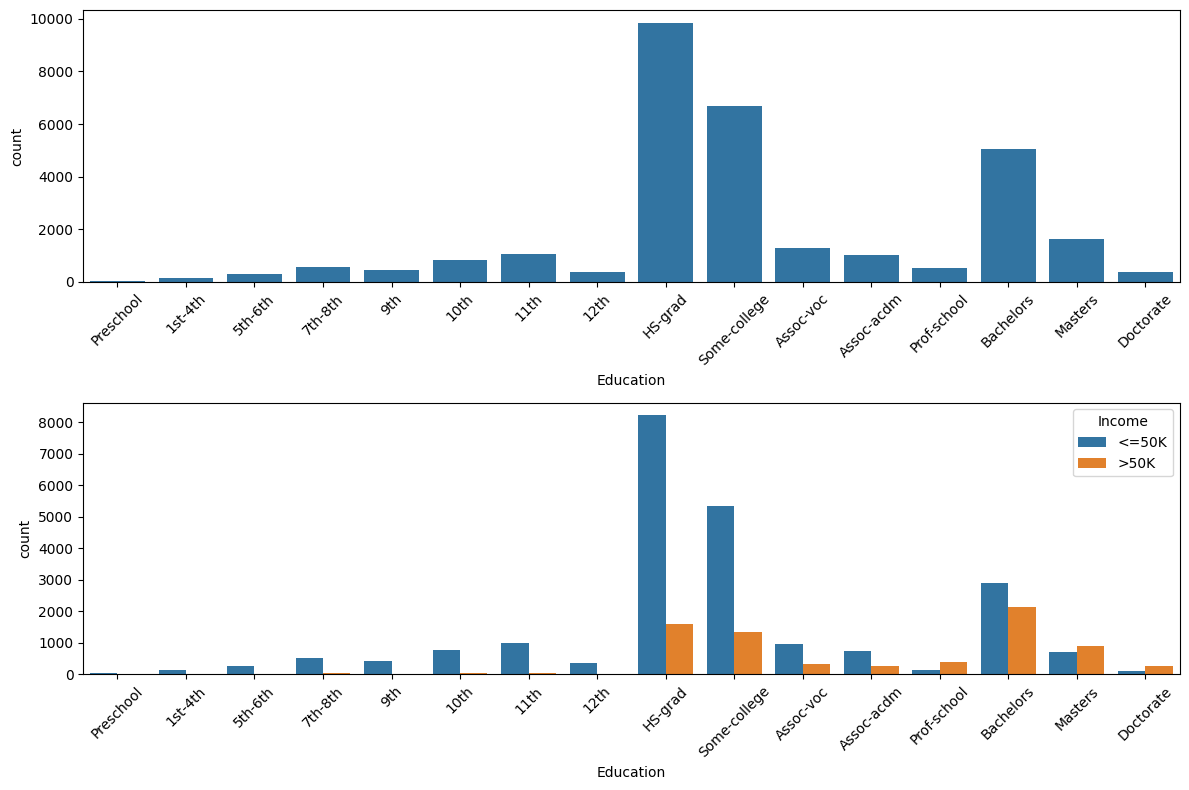

In [ ]:
education_category_ordering = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th',
    '9th', '10th', '11th', '12th', 'HS-grad',
    'Some-college', 'Assoc-voc', 'Assoc-acdm',
    'Prof-school', 'Bachelors', 'Masters', 'Doctorate'
]

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.countplot(x=df['Education'],
              order=education_category_ordering)
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.countplot(x=df.Education,
              hue=df.Income,
              order=education_category_ordering)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observations

Most people are high-school graduates, lots persued some form of higher education and some even went for masters and doctorates.

The Education feature is right-skewed (toward higher education).

The correlation between `Income` and `Education` is evident. More educated people have (ratio-wise) higher income. The number of people with higher income grows and only in `Prof-school`, `Masters` and `Doctorate` are there more people with higher income.

## **Capital on Income**



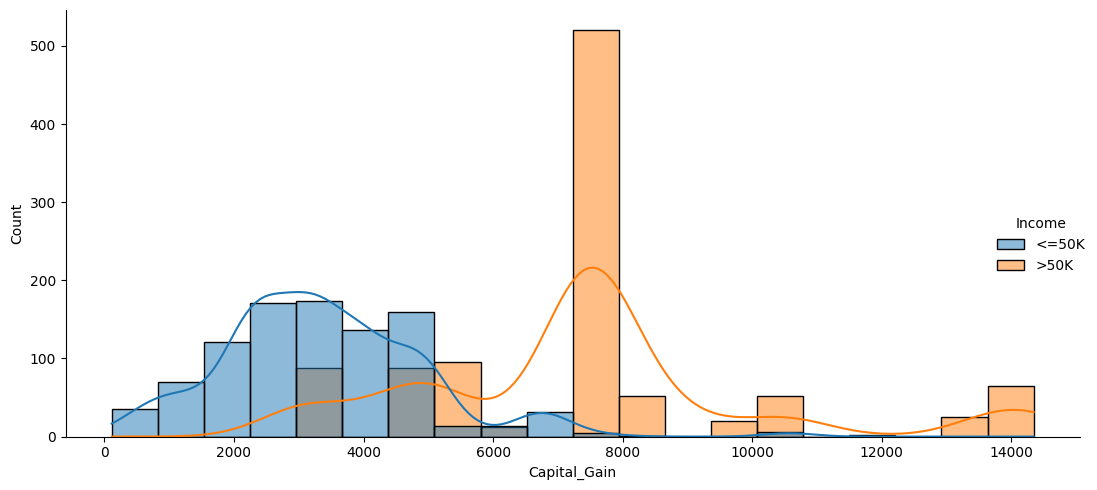

In [ ]:
df_temp = df.loc[df.Capital_Gain <= 15_000]

df_temp_filtered = df_temp[df_temp['Capital_Gain'] > 0]  # we only care about non-zero capital gain

sns.displot(data=df_temp_filtered,
            x='Capital_Gain',
            hue='Income',
            kde=True,
            height=5, aspect=2)

plt.tight_layout()
plt.show()

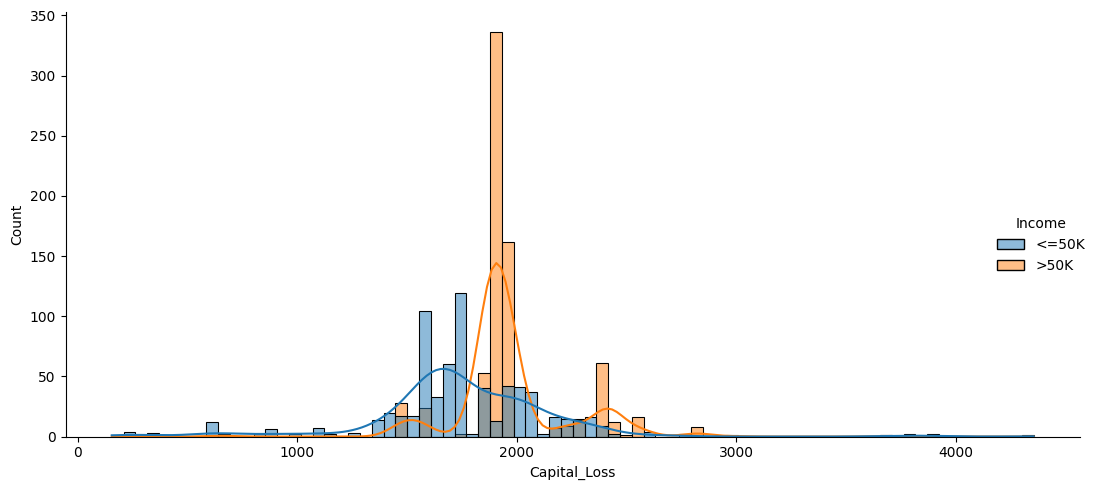

In [ ]:
df_temp = df.loc[df['Capital_Loss'] <= 15_000]

df_temp_filtered = df_temp[df_temp['Capital_Loss'] > 0]  # we only care about non-zero capital gain

sns.displot(data=df_temp_filtered,
            x='Capital_Loss',
            hue='Income',
            kde=True,
            height=5, aspect=2)

plt.tight_layout()
plt.show()

### Observation

The results aren't very surprising. The group with higher income has higher Capital_Gain.

The Capital_Loss is a bit more interesting. The high income group has higher losses.
However their gains outweigh their losses, making them profit quit a bit.

For the low income group, the difference between capital gain and loss is much smaller.

## **Workclass on Income**

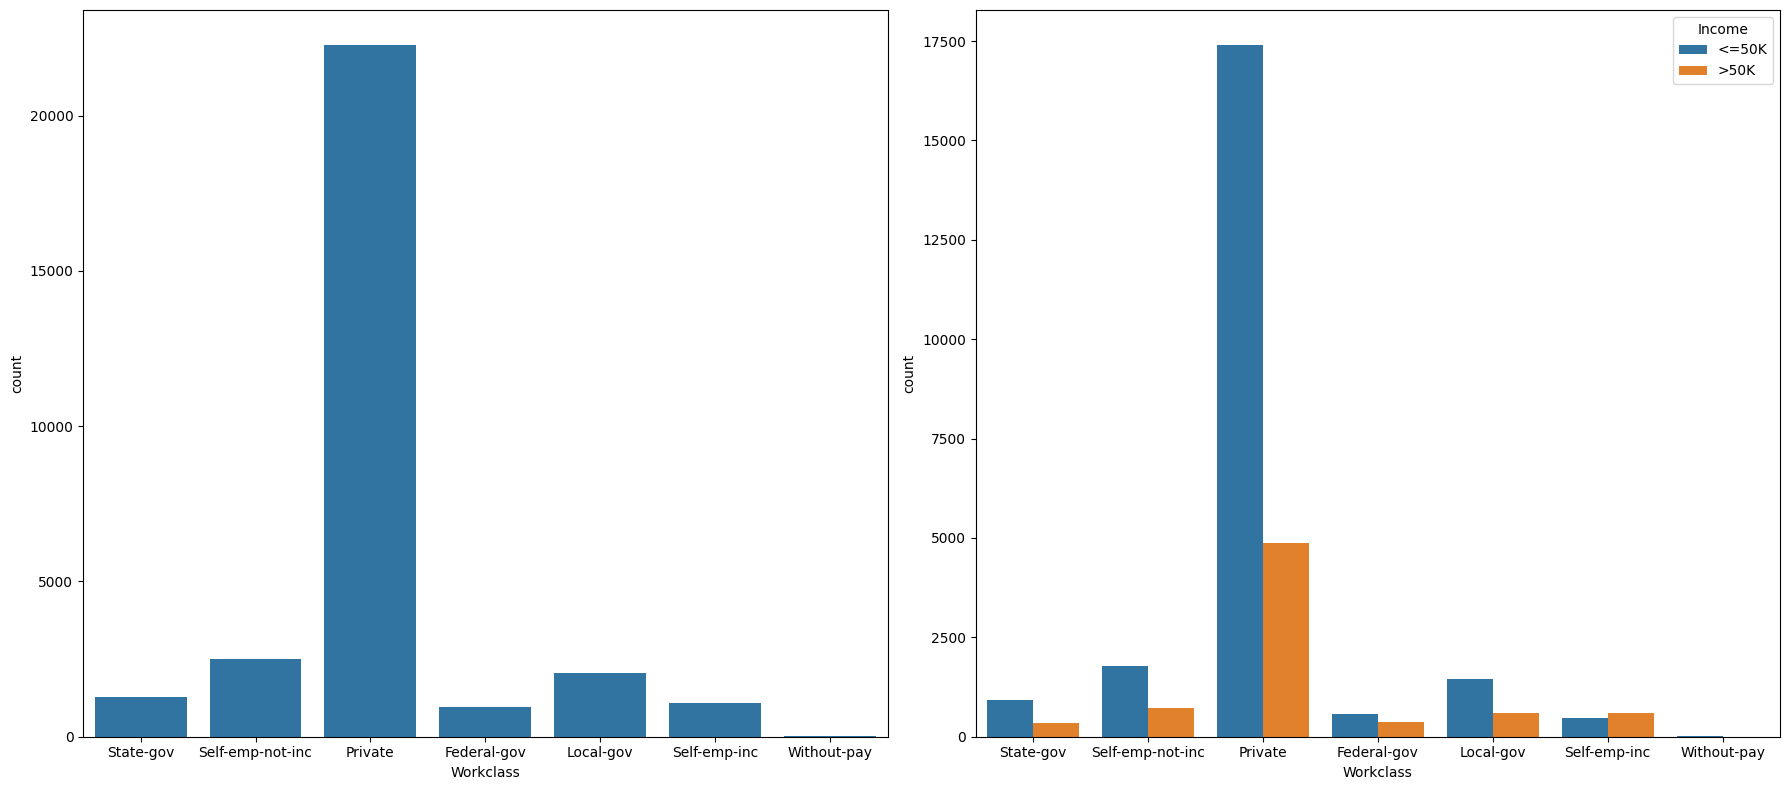

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.countplot(x=df['Workclass'])

plt.subplot(1,2,2)
sns.countplot(x=df['Workclass'], hue=df['Income'])

plt.tight_layout()
plt.show()

### Observations

Most work in the private sector. Pretty much all workclasses have a great imbalance between high and low income groups.

Only self employed (incorporated) group have a majority with a high income.

## **Occupation on Income**

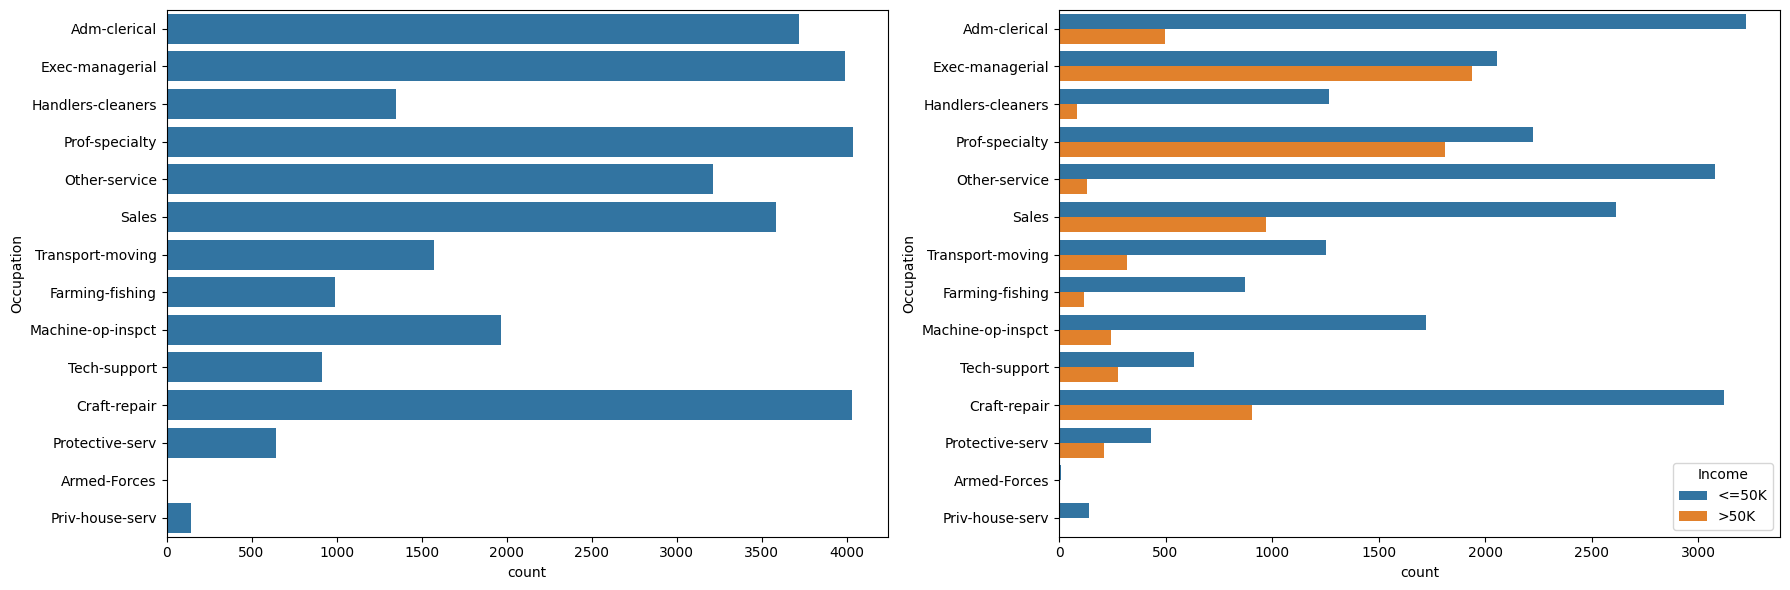

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(df['Occupation'])

plt.subplot(1,2,2)
sns.countplot(y=df['Occupation'], hue=df['Income'])

plt.tight_layout()
plt.show()

### Observations

- `Other-service` has the highest proportion of middle and low income

- `Adm-clerical` also has a high proportion of low income.

- `Prof-specialty` & `Exec-managerial` paid very well. Almost 50% of the people working in the Exec-managerial business can earn more than 50k a year.



## **Marital Status and Relationship on Income**

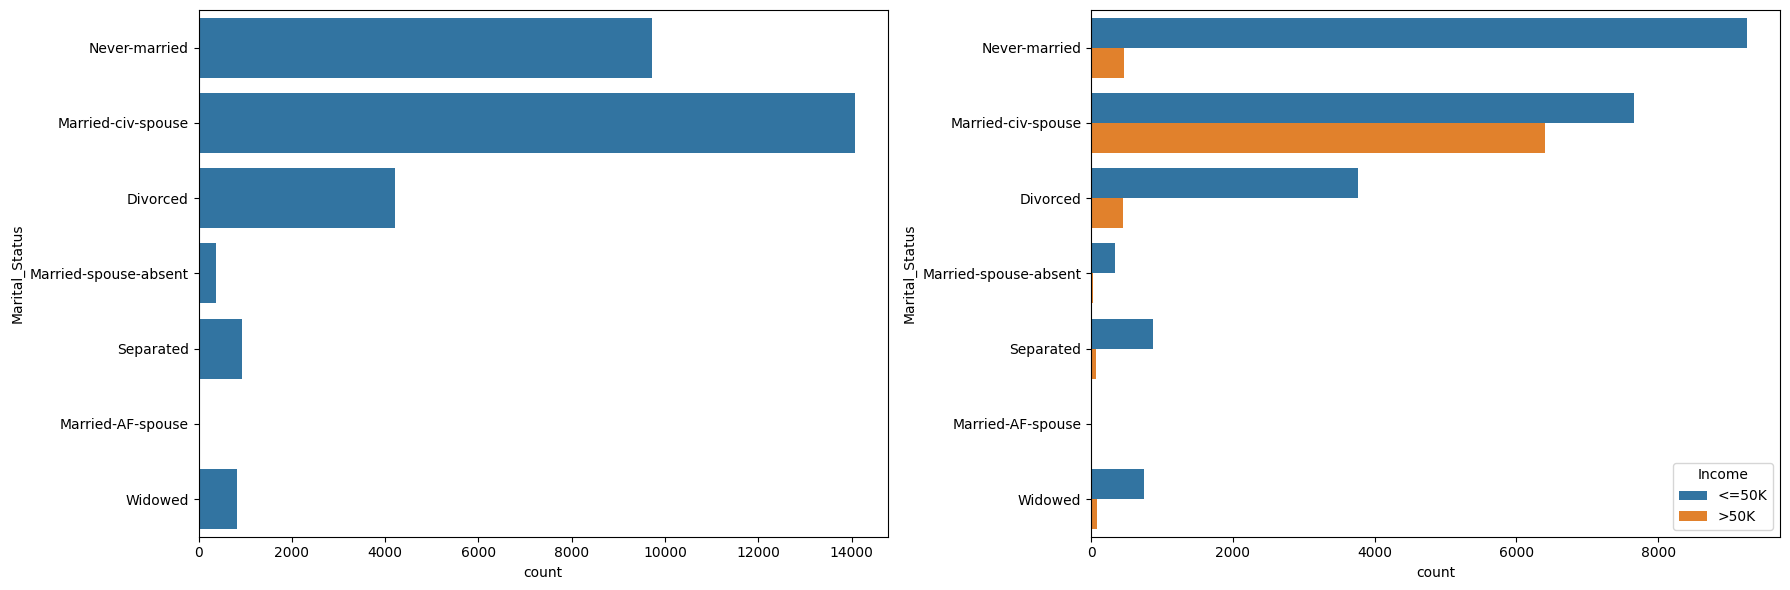

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(df['Marital_Status'])

plt.subplot(1,2,2)
sns.countplot(y=df['Marital_Status'], hue=df['Income'])

plt.tight_layout()
plt.show()

### Observations (Marital Status)

Marriage has a hude impact on people's annual income.

Almost 90% of the never-married group earns less than 50K a year (Same thing within the divorced community).

On the other hand, these plots reveal that most of the high income people are married couples.

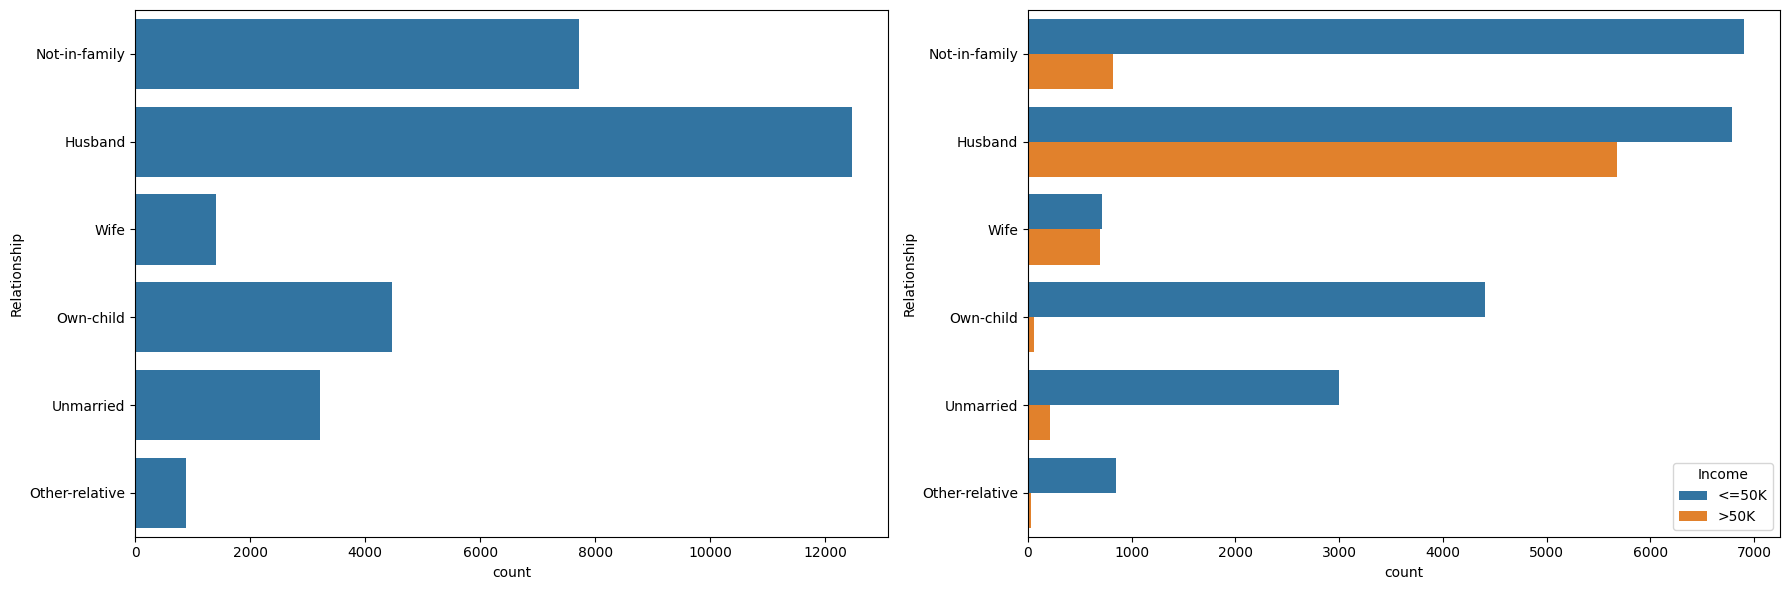

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(df['Relationship'])

plt.subplot(1,2,2)
sns.countplot(y=df['Relationship'], hue=df['Income'])

plt.tight_layout()
plt.show()

### Obervations (Relationship)

It seems like families with children (`Own-child`) are overwhelmingly low-income.

The same with group without a family (`Not-in-family`), which is probably correlated with non-married people (`Unmarried`).

## **Race and Native Country on Income**

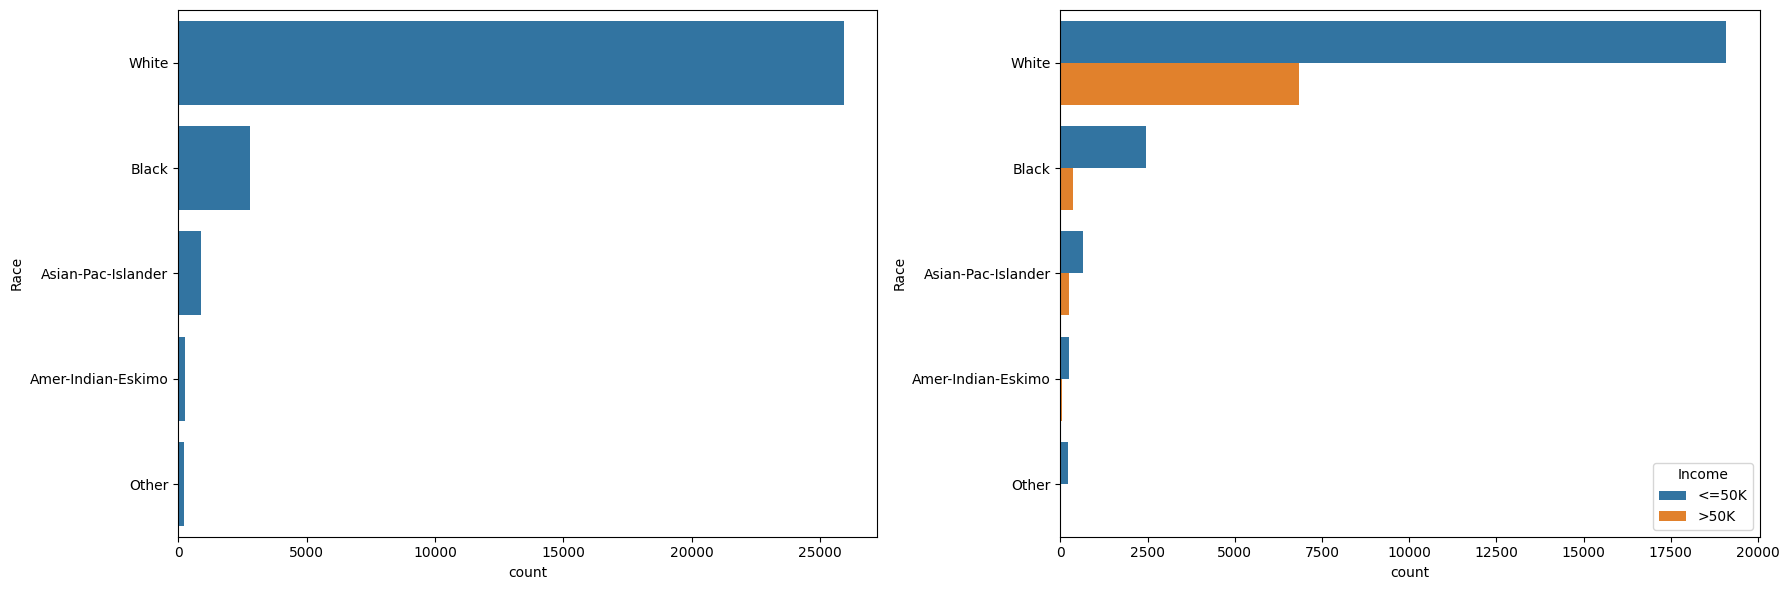

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(df['Race'])

plt.subplot(1,2,2)
sns.countplot(y=df['Race'], hue=df['Income'])

plt.tight_layout()
plt.show()

### Observations (Race)

Most of the people in this dataset are `White`.

There is a racial imbalance in the dataset that might make this variable less important during classifying.

From what I can see, there's no significant difference between races and income.
The proportions seem all about the same.

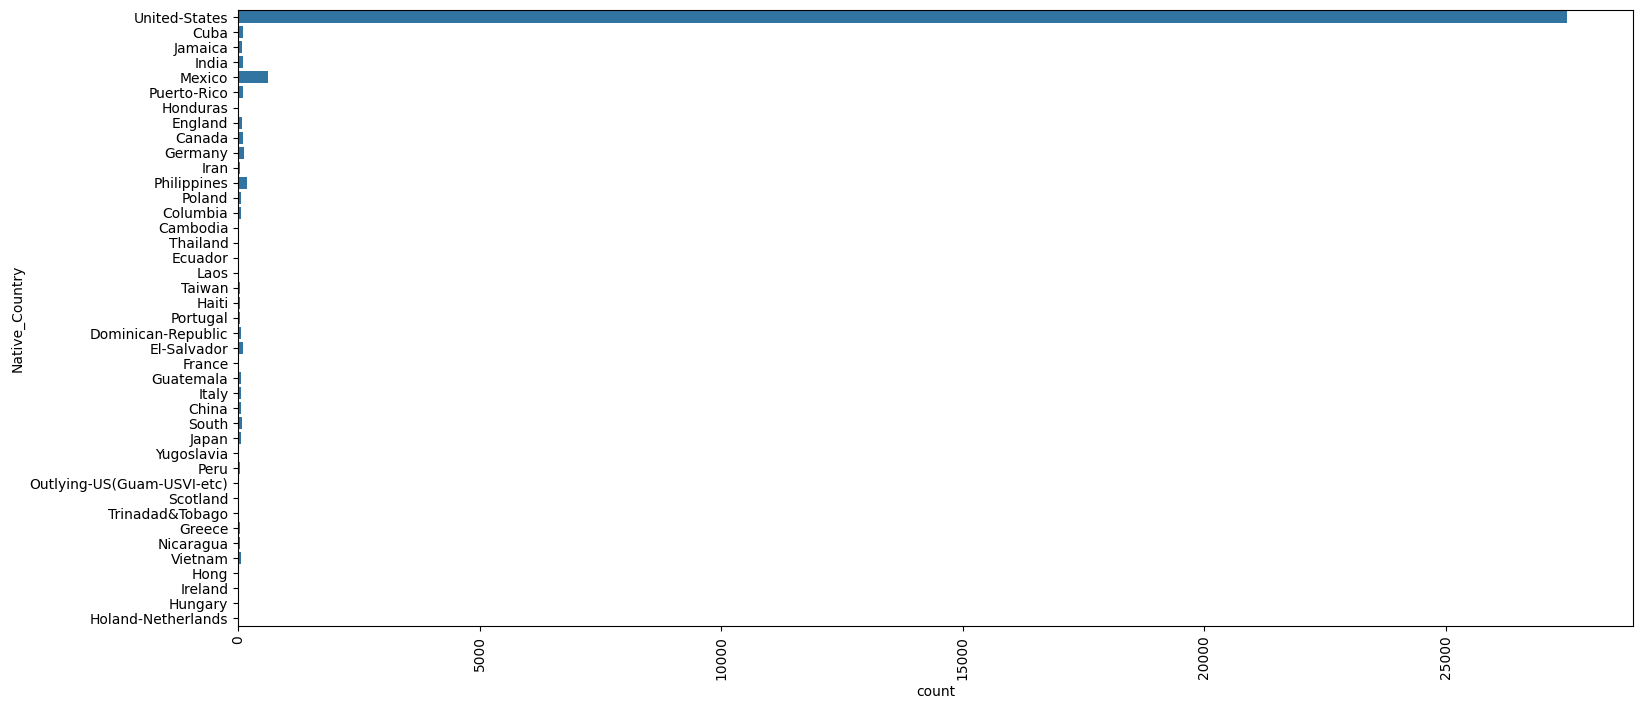

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(y=df['Native_Country'])
plt.xticks(rotation=90)
plt.show()

### Observations

There is also an imbalance inside the Native_Country variable.

The U.S. citizens account for above 90% of the total observations.

The reasonable thing to do probably is to split the analysis into two:
- USA
- other countries

In [ ]:
df_USA = df.loc[df['Native_Country'] == 'United-States']
df_other = df.loc[df['Native_Country'] != 'United-States']

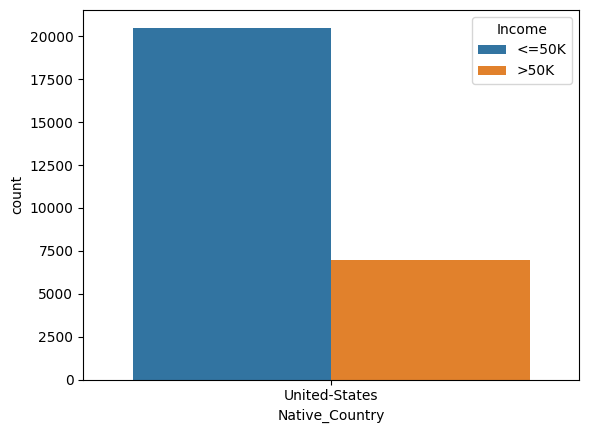

In [ ]:
sns.countplot(x=df_USA['Native_Country'], hue=df_USA['Income'])
plt.show()

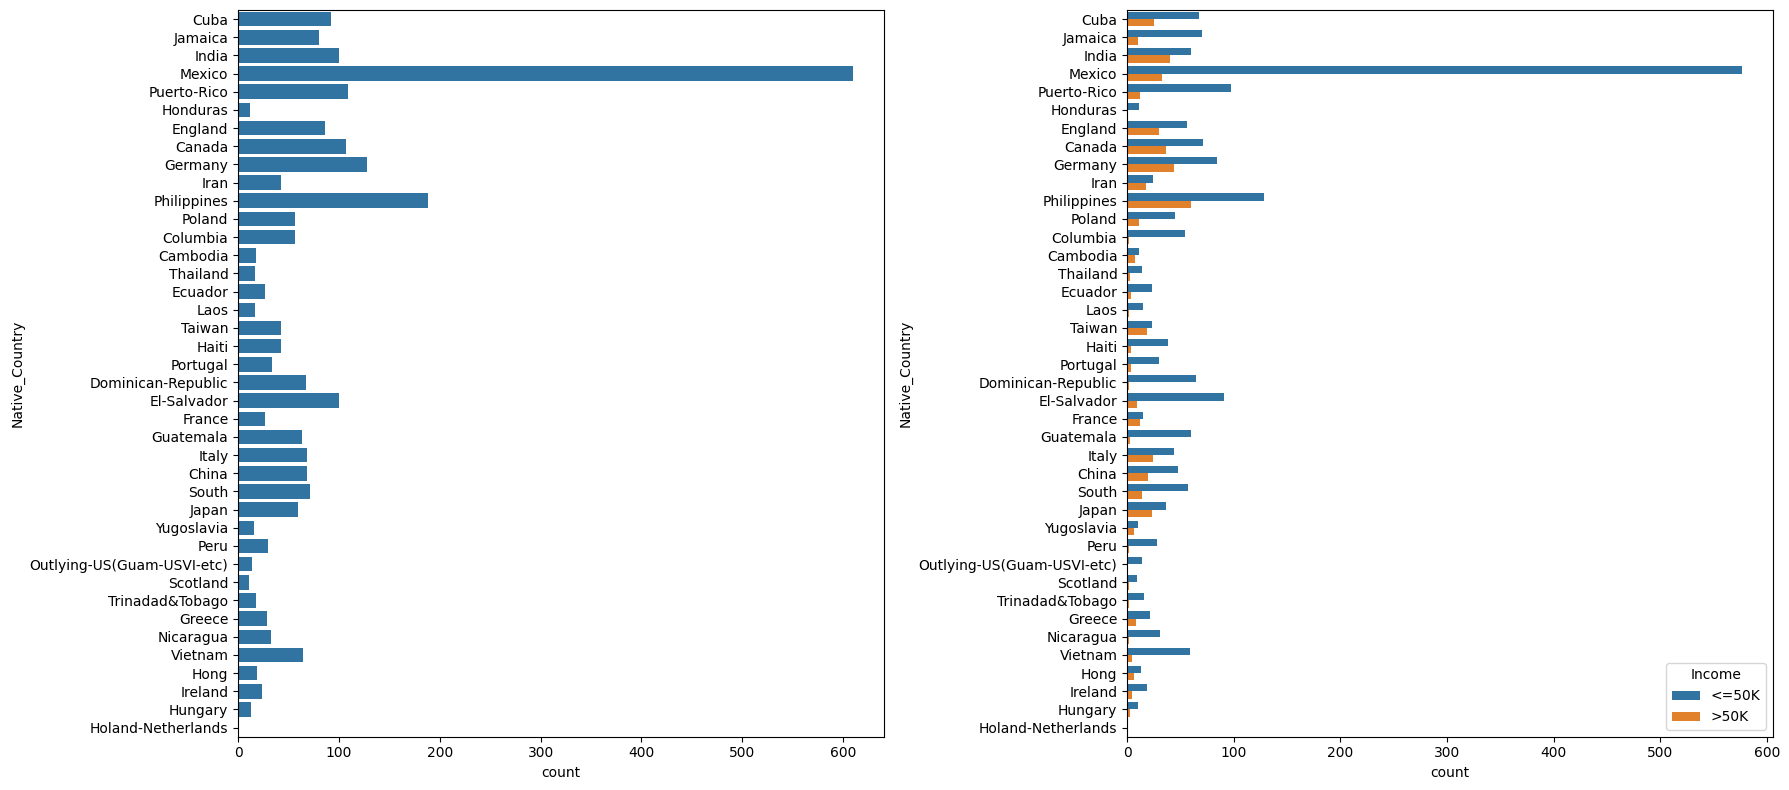

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.countplot(df_other['Native_Country'])

plt.subplot(1,2,2)
sns.countplot(y=df_other['Native_Country'], hue=df_other['Income'])

plt.tight_layout()
plt.show()

### Final Observations

Lower income countries:
- Vietnam
- Mexico
- Puerto-Rico
- Jamaica
- Guatemala
- El-Salvador
- Dominican-Republic

Higher income countries:
- Japan
- Iran
- India
- Germany
- England
- Canada
- United States of America
- Taiwan

And so on...

# **Classification**

As for classification scoring metric I chose f1 score.
I didn't opt for accuracy because the dataset is very imbalanced, and as for recall and precision, they are just that. F1 score gives me balanced scoring metric.

The models I will be using are:
* Decision Tree
* Random Forest
* Multi-layer Perceptron (MLP)
* SVC
* K Nearest Neighbours

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [145]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [146]:
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    KFold,
)

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [148]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [149]:
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
)

In [150]:
def show_metrics(y_test_, y_pred_):
    print(f"{accuracy_score(y_test_, y_pred_) = }")
    print(f"{precision_score(y_test_, y_pred_) = }")
    print(f"{recall_score(y_test_, y_pred_) = }")
    print(f"{f1_score(y_test_, y_pred_) = }")

    cm = confusion_matrix(y_test_, y_pred_, labels=clf.classes_)
    ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
    plt.show()

## **Preprocessing**

In [169]:
# Making a convenience function to encode columns

def encode_columns_one_hot(df: pd.DataFrame, columns: list[str]):
    for column in columns:
        encoded_column = pd.get_dummies(df[column], prefix=column, dtype=int)
        df = pd.concat([df, encoded_column], axis=1)
        df = df.drop(column, axis=1)
    return df

def encode_columns_ordinal(df: pd.DataFrame, columns: list[str]):
    for column in columns:
        categories = list(df[column].unique())

        encoder = OrdinalEncoder(categories=[categories])
        encoded_column = encoder.fit_transform(df[[column]])

        df.loc[:, column] = encoded_column
    return df

### **Encoding**


In [170]:
# Encoding all categorical features with via new function

df_classify = df.copy()

df_classify = encode_columns_ordinal(df_classify, categorical_features)

# Convert 'Income' column to float type
df_classify['Income'] = df_classify['Income'].astype(float)

display(df_classify.shape)
display(df_classify.head())

(30162, 14)

,Age,Workclass,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,2174,0,40,0.0,0.0
1,50,1.0,0.0,13,1.0,1.0,1.0,0.0,0.0,0,0,13,0.0,0.0
2,38,2.0,1.0,9,2.0,2.0,0.0,0.0,0.0,0,0,40,0.0,0.0
3,53,2.0,2.0,7,1.0,2.0,1.0,1.0,0.0,0,0,40,0.0,0.0
4,28,2.0,0.0,13,1.0,3.0,2.0,1.0,1.0,0,0,40,1.0,0.0


### **Splitting**

In [171]:
X, y = df_classify.drop(columns=['Income']), df_classify.Income

X.shape, y.shape

((30162, 13), (30162,))

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 13), (6033, 13), (24129,), (6033,))

In [173]:
y_train.value_counts()

,count
Income,
0.0,18171
1.0,5958


### **Scaling the Dataset**

**Normalization** is often used for algorithms sensitive to magnitude, like **neural networks** and **k-NN**.

Meanwhile **standardization** is better for algorithms that assume a Gaussian distribution, such as **linear regression** and **SVM**.

In [174]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_std, y_test.values

(array([[ 0.04676081, -0.11738447,  0.45051799, ..., -0.21855145,
          0.75705616, -0.2386548 ],
        [-0.25810049, -0.11738447, -0.6984368 , ..., -0.21855145,
         -0.07517273, -0.2386548 ],
        [ 0.04676081, -0.11738447, -0.6984368 , ..., -0.21855145,
          1.58928506, -0.2386548 ],
        ...,
        [-1.62997636, -0.11738447,  2.46118886, ..., -0.21855145,
         -1.73963052, -0.2386548 ],
        [ 0.27540679, -1.19310415, -0.6984368 , ..., -0.21855145,
         -0.07517273,  2.60424754],
        [-0.94403842, -0.11738447, -0.6984368 , ..., -0.21855145,
         -0.07517273, -0.2386548 ]]),
 array([1., 0., 0., ..., 0., 1., 1.]))

In [175]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train_norm = min_max_scaler.transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

X_train_norm

array([[0.30136986, 0.33333333, 0.33333333, ..., 0.        , 0.5       ,
        0.        ],
       [0.24657534, 0.33333333, 0.06666667, ..., 0.        , 0.39795918,
        0.        ],
       [0.30136986, 0.33333333, 0.06666667, ..., 0.        , 0.60204082,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.8       , ..., 0.        , 0.19387755,
        0.        ],
       [0.34246575, 0.16666667, 0.06666667, ..., 0.        , 0.39795918,
        0.35      ],
       [0.12328767, 0.33333333, 0.06666667, ..., 0.        , 0.39795918,
        0.        ]])

## **Running Classifer Models**

First I'm going to run the models with default settings and see which one performs the best out of the box.

### **Default Parameters**

In [176]:
# normalization
mlp_clf = MLPClassifier(random_state=1)
knn_clf = KNeighborsClassifier()

# standardization
svc_clf = SVC(random_state=1)

# no need
dt_clf = DecisionTreeClassifier(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)

MLPClassifier
accuracy_score(y_test_, y_pred_) = 0.8529753025029008
precision_score(y_test_, y_pred_) = 0.7551963048498845
recall_score(y_test_, y_pred_) = 0.6329032258064516
f1_score(y_test_, y_pred_) = 0.6886626886626886


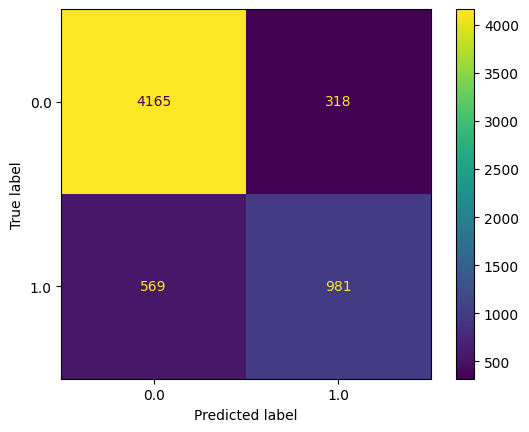

KNeighborsClassifier
accuracy_score(y_test_, y_pred_) = 0.8219791148682247
precision_score(y_test_, y_pred_) = 0.6792168674698795
recall_score(y_test_, y_pred_) = 0.5819354838709677
f1_score(y_test_, y_pred_) = 0.6268241834607367


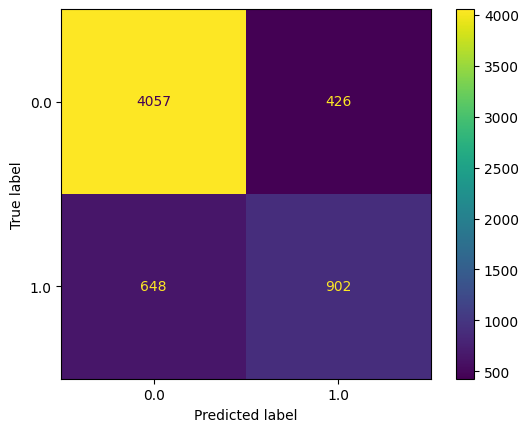

In [177]:
# Using normalized data

for clf in (mlp_clf, knn_clf):
    clf.fit(X_train_norm, y_train)

    y_pred = clf.predict(X_test_norm)

    print(f'{clf.__class__.__name__}')
    show_metrics(y_test, y_pred)

SVC
accuracy_score(y_test_, y_pred_) = 0.8455163268688878
precision_score(y_test_, y_pred_) = 0.7824497257769653
recall_score(y_test_, y_pred_) = 0.552258064516129
f1_score(y_test_, y_pred_) = 0.6475037821482602


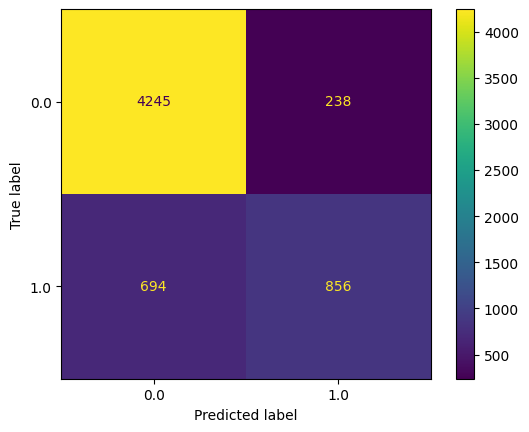

In [178]:
# Using standardized data

for clf in (svc_clf, ):
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    print(f'{clf.__class__.__name__}')
    show_metrics(y_test, y_pred)

DecisionTreeClassifier
accuracy_score(y_test_, y_pred_) = 0.808055693684734
precision_score(y_test_, y_pred_) = 0.6324324324324324
recall_score(y_test_, y_pred_) = 0.6038709677419355
f1_score(y_test_, y_pred_) = 0.6178217821782178


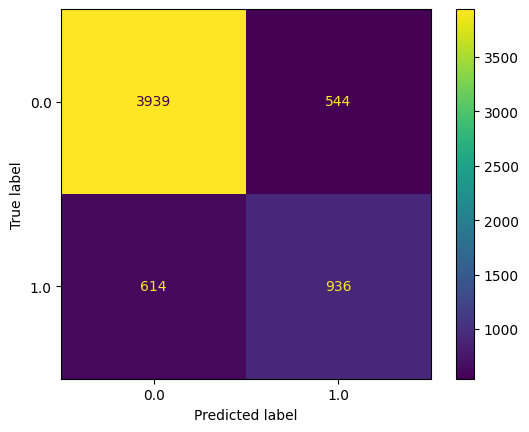

RandomForestClassifier
accuracy_score(y_test_, y_pred_) = 0.8441902867561744
precision_score(y_test_, y_pred_) = 0.7310606060606061
recall_score(y_test_, y_pred_) = 0.6225806451612903
f1_score(y_test_, y_pred_) = 0.6724738675958188


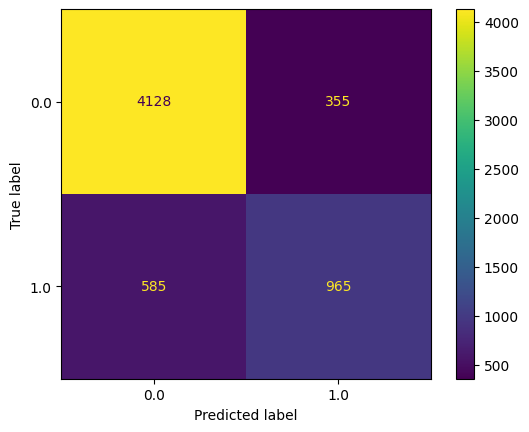

In [179]:
# Using original data

for clf in (dt_clf, rf_clf, ):
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    print(f'{clf.__class__.__name__}')
    show_metrics(y_test, y_pred)

#### **Report**


In [215]:
default_params_result = {
    'Model': [
        'MLPClassifier',
        'KNeighborsClassifier',
        'SVC',
        'DecisionTreeClassifier',
        'RandomForestClassifier'
    ],
    'Accuracy': [
        0.8529753025029008,
        0.8219791148682247,
        0.8455163268688878,
        0.808055693684734,
        0.8441902867561744
    ],
    'Precision': [
        0.7551963048498845,
        0.6792168674698795,
        0.7824497257769653,
        0.6324324324324324,
        0.7310606060606061
    ],
    'Recall': [
        0.6329032258064516,
        0.5819354838709677,
        0.552258064516129,
        0.6038709677419355,
        0.6225806451612903
    ],
    'F1': [
        0.6886626886626886,
        0.6268241834607367,
        0.6475037821482602,
        0.6178217821782178,
        0.6724738675958188
    ]
}

df_result_default_params = pd.DataFrame(default_params_result)
df_result_default_params

,Model,Accuracy,Precision,Recall,F1
0,MLPClassifier,0.852975,0.755196,0.632903,0.688663
1,KNeighborsClassifier,0.821979,0.679217,0.581935,0.626824
2,SVC,0.845516,0.782450,0.552258,0.647504
3,DecisionTreeClassifier,0.808056,0.632432,0.603871,0.617822
4,RandomForestClassifier,0.844190,0.731061,0.622581,0.672474


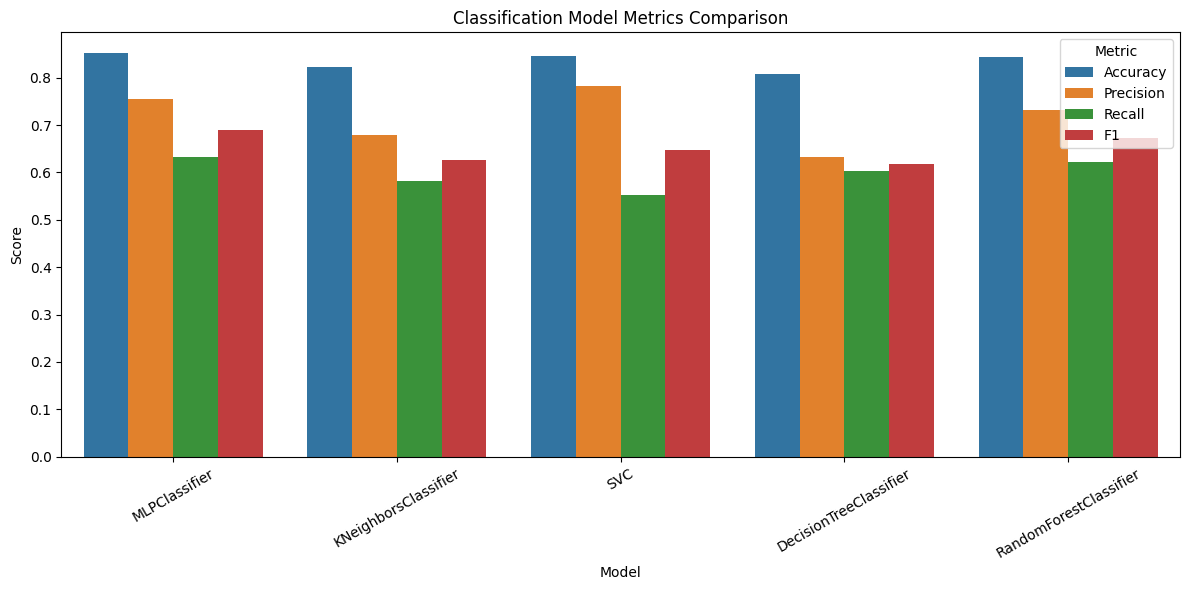

In [216]:
df_melt_dp = df_result_default_params.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(data=df_melt_dp, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=30)
plt.title('Classification Model Metrics Comparison')
plt.tight_layout()

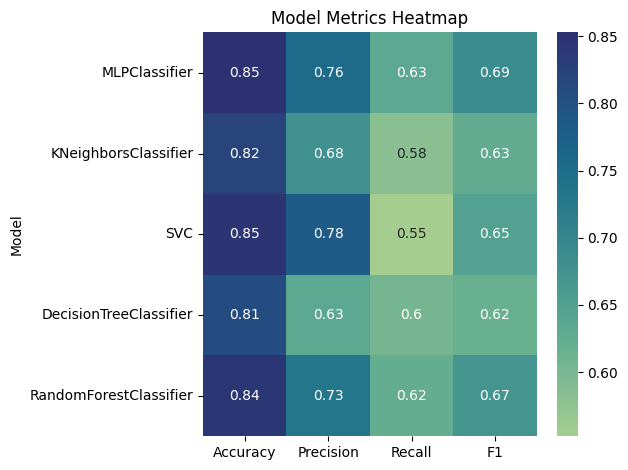

In [224]:
plt.figure()
sns.heatmap(df_result_default_params.set_index('Model'), annot=True, cmap='crest')
plt.title('Model Metrics Heatmap')
plt.tight_layout()


From this report I choose to optimize these models:
- MLP
- SVC
- Random Forest

### **Hyper-Parameter Optimization**

In [183]:
svc_pipe = SVC(random_state=1)
mlp_pipe = MLPClassifier(random_state=1, max_iter=500, verbose=True)
rf_clf = RandomForestClassifier(random_state=1)

In [192]:
mlp_params = {
    'hidden_layer_sizes': [(64,), (128,), (64,32), (128,64)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'solver': ['adam', 'sgd']
}

svc_params = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
}

In [202]:
# Grid searches
svc_search = GridSearchCV(svc_pipe, svc_params, cv=5, n_jobs=-1, scoring='f1', verbose=4)
mlp_search = GridSearchCV(mlp_pipe, mlp_params, cv=5, n_jobs=-1, scoring='f1', verbose=4)
rf_search = GridSearchCV(rf_clf, rf_params, cv=5, n_jobs=-1, scoring='f1', verbose=4)

In [203]:
mlp_search.fit(X_train_norm, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Iteration 1, loss = 0.48164739
Iteration 2, loss = 0.39173012
Iteration 3, loss = 0.35434579
Iteration 4, loss = 0.34108631
Iteration 5, loss = 0.33691175
Iteration 6, loss = 0.33430871
Iteration 7, loss = 0.33187478
Iteration 8, loss = 0.33322433
Iteration 9, loss = 0.33011905
Iteration 10, loss = 0.32857457
Iteration 11, loss = 0.32847579
Iteration 12, loss = 0.32770500
Iteration 13, loss = 0.32747667
Iteration 14, loss = 0.32749986
Iteration 15, loss = 0.32711180
Iteration 16, loss = 0.32503669
Iteration 17, loss = 0.32444377
Iteration 18, loss = 0.32466610
Iteration 19, loss = 0.32325954
Iteration 20, loss = 0.32437732
Iteration 21, loss = 0.32232399
Iteration 22, loss = 0.32259880
Iteration 23, loss = 0.32166680
Iteration 24, loss = 0.32262234
Iteration 25, loss = 0.32294845
Iteration 26, loss = 0.32233408
Iteration 27, loss = 0.32155446
Iteration 28, loss = 0.31998544
Iteration 29, loss = 0.32172270
Iteration 30, loss =

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=500, random_state=1,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(64,), (128,), (64, 32),
                                                (128, 64)],
                         'solver': ['adam', 'sgd']},
             scoring='f1', verbose=4)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=1,
              verbose=True)

np.float64(0.6682943041635572)

accuracy_score(y_test_, y_pred_) = 0.8509862423338306
precision_score(y_test_, y_pred_) = 0.7475285171102661
recall_score(y_test_, y_pred_) = 0.6341935483870967
f1_score(y_test_, y_pred_) = 0.6862129144851657


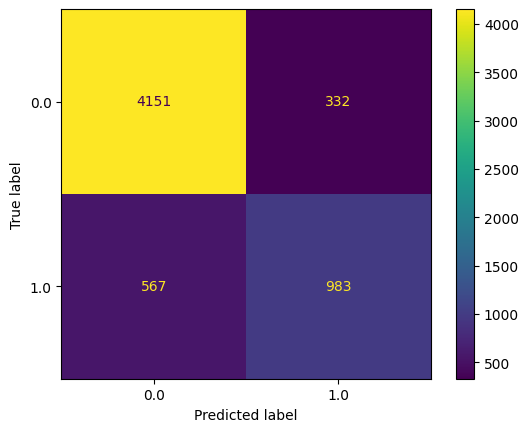

In [208]:
display(mlp_search.best_estimator_)
display(mlp_search.best_score_)
y_pred = mlp_search.predict(X_test_norm)
show_metrics(y_test, y_pred)

After optimizing the MLP, the scoring metrics are even worse. It's probably due to overfitting.

In [209]:
svc_search.fit(X_train_std, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='f1', verbose=4)

SVC(C=10, gamma=0.1, random_state=1)

np.float64(0.6385024005775369)

accuracy_score(y_test_, y_pred_) = 0.8450190618266202
precision_score(y_test_, y_pred_) = 0.762596071733561
recall_score(y_test_, y_pred_) = 0.5761290322580646
f1_score(y_test_, y_pred_) = 0.6563763322307975


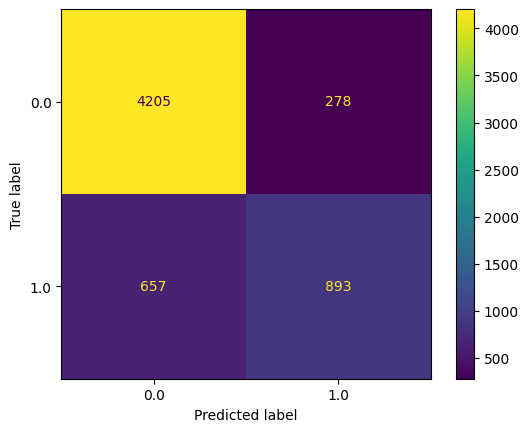

In [211]:
display(svc_search.best_estimator_)
display(svc_search.best_score_)
y_pred = svc_search.predict(X_test_std)
show_metrics(y_test, y_pred)

In [196]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=4)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=1)

np.float64(0.68597764925524)

accuracy_score(y_test_, y_pred_) = 0.8634178683905188
precision_score(y_test_, y_pred_) = 0.8071065989847716
recall_score(y_test_, y_pred_) = 0.6154838709677419
f1_score(y_test_, y_pred_) = 0.698389458272328


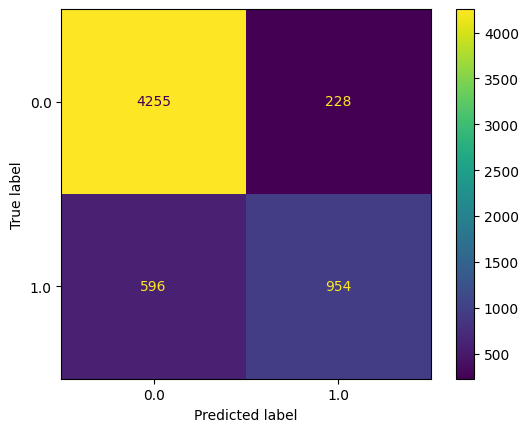

In [200]:
display(rf_search.best_estimator_)
display(rf_search.best_score_)
y_pred = rf_search.predict(X_test)
show_metrics(y_test, y_pred)

#### **Report**

Raw Output:

```
MLP
accuracy_score(y_test_, y_pred_) = 0.8509862423338306
precision_score(y_test_, y_pred_) = 0.7475285171102661
recall_score(y_test_, y_pred_) = 0.6341935483870967
f1_score(y_test_, y_pred_) = 0.6862129144851657

SVC
accuracy_score(y_test_, y_pred_) = 0.8450190618266202
precision_score(y_test_, y_pred_) = 0.762596071733561
recall_score(y_test_, y_pred_) = 0.5761290322580646
f1_score(y_test_, y_pred_) = 0.6563763322307975

Random Forest
accuracy_score(y_test_, y_pred_) = 0.8634178683905188
precision_score(y_test_, y_pred_) = 0.8071065989847716
recall_score(y_test_, y_pred_) = 0.6154838709677419
f1_score(y_test_, y_pred_) = 0.698389458272328
```

In [218]:
hyper_param_opt_results = [
    ["MLP", 0.8509862423338306, 0.7475285171102661, 0.6341935483870967, 0.6862129144851657],
    ["SVC", 0.8450190618266202, 0.762596071733561,  0.5761290322580646, 0.6563763322307975],
    ["Random Forest", 0.8634178683905188, 0.8071065989847716, 0.6154838709677419, 0.698389458272328]
]

df_hpopt = pd.DataFrame(hyper_param_opt_results,
                  columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
df_hpopt

,Model,Accuracy,Precision,Recall,F1
0,MLP,0.850986,0.747529,0.634194,0.686213
1,SVC,0.845019,0.762596,0.576129,0.656376
2,Random Forest,0.863418,0.807107,0.615484,0.698389


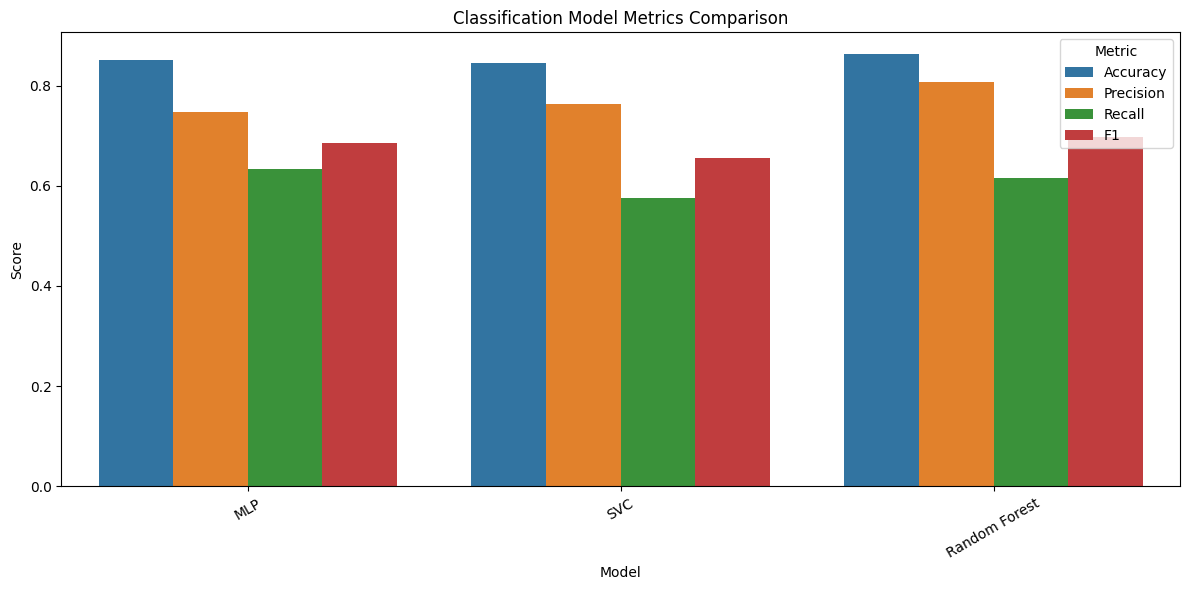

In [219]:
df_melt_hpopt = df_hpopt.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(data=df_melt_hpopt, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=30)
plt.title('Classification Model Metrics Comparison')
plt.tight_layout()

#### **Comparing Models with Default Parameters and HP-Optimized Parameters**

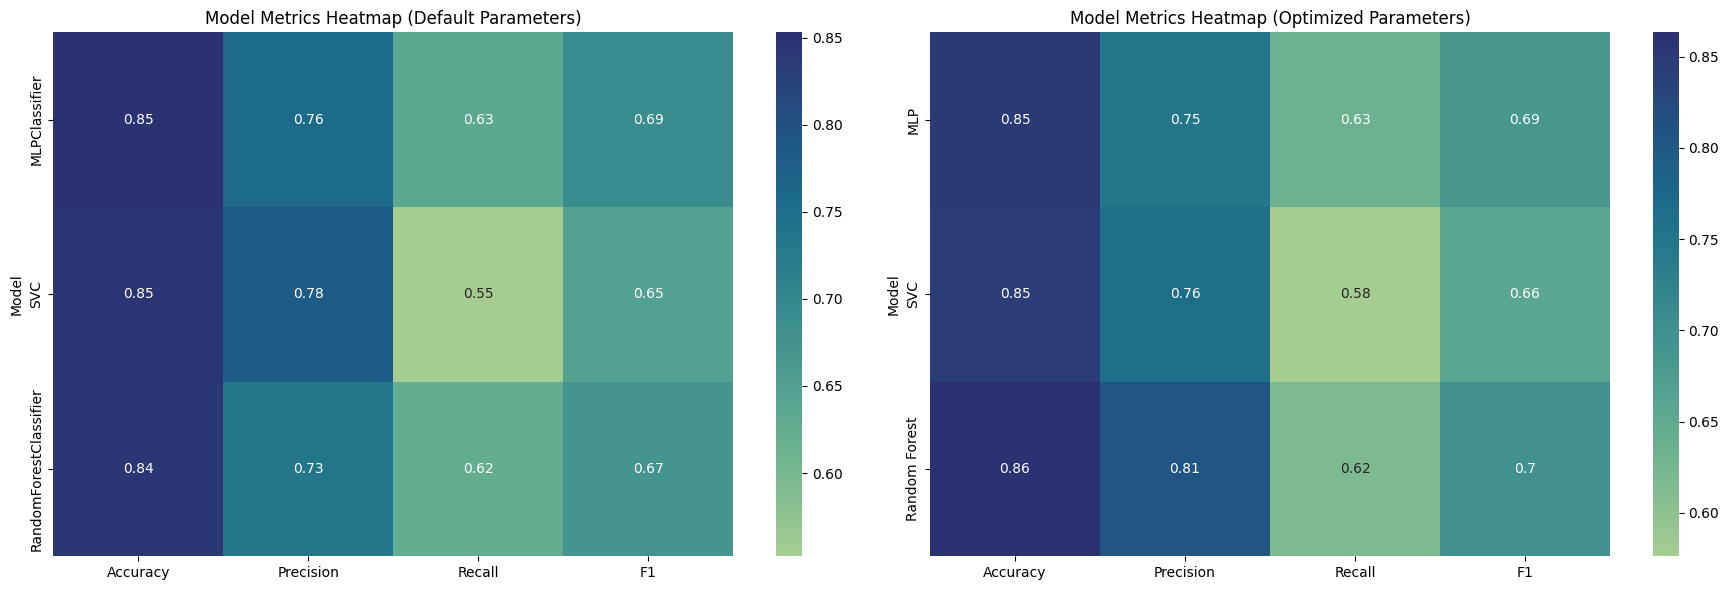

In [232]:
df_defp_selection = df_result_default_params.loc[df_result_default_params['Model'].isin(['MLPClassifier', 'SVC', 'RandomForestClassifier'])]

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.heatmap(df_defp_selection.set_index('Model'), annot=True, cmap='crest')
plt.title('Model Metrics Heatmap (Default Parameters)')

plt.subplot(1,2,2)
sns.heatmap(df_hpopt.set_index('Model'), annot=True, cmap='crest')
plt.title('Model Metrics Heatmap (Optimized Parameters)')

plt.tight_layout()
plt.show()

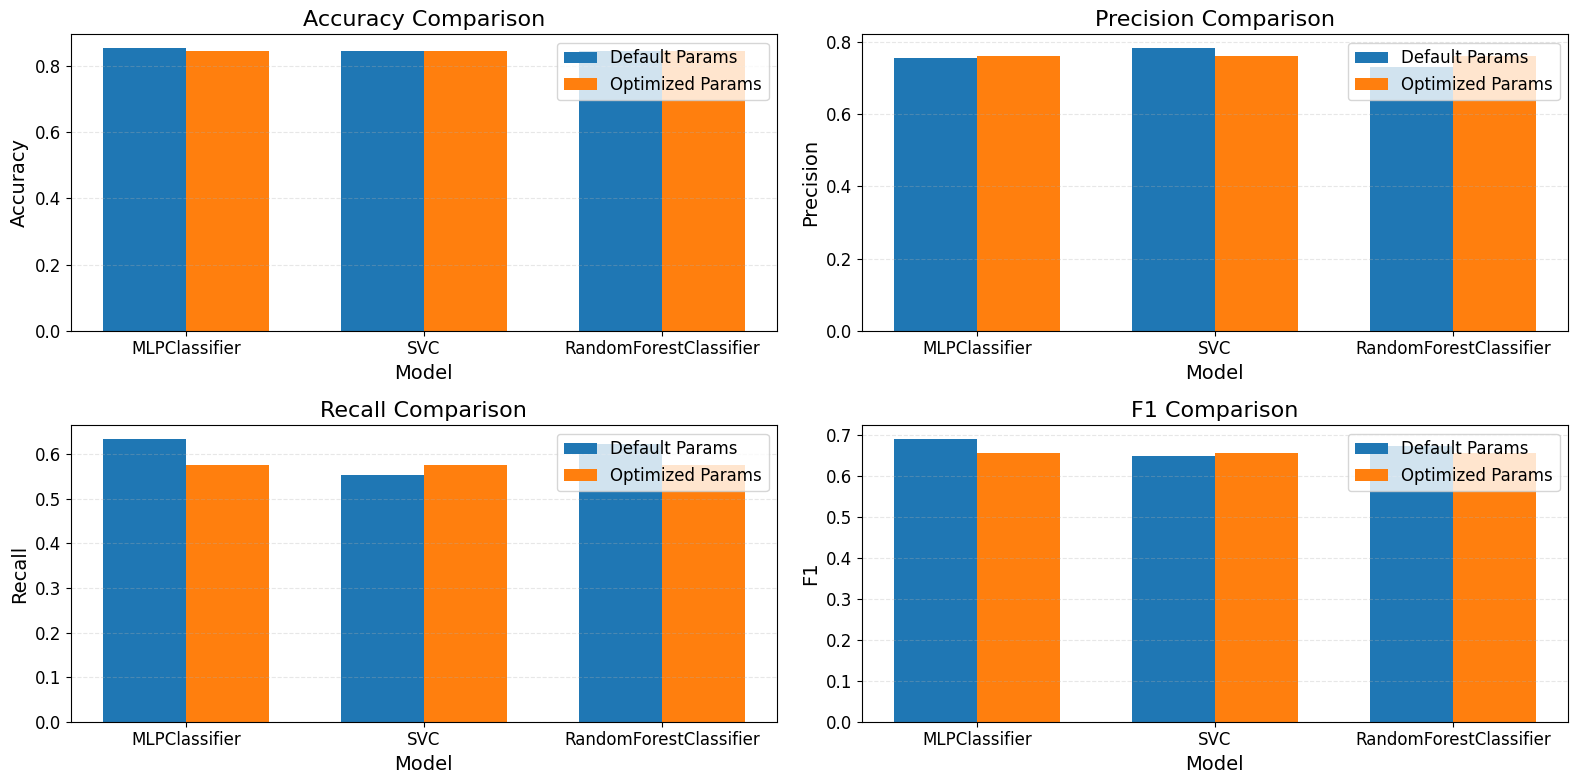

In [257]:
models = ['MLPClassifier', 'SVC', 'RandomForestClassifier']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

df_default = df_result_default_params[df_result_default_params['Model'].isin(models)]
df_opt = df_hpopt[df_hpopt['Model'].isin(models)]

plt.figure(figsize=(16, 8))

plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14
})

for i, m in enumerate(metrics):
    plt.subplot(2, 2, i + 1)

    x = np.arange(len(models))
    width = 0.35  # bar width

    plt.bar(x - width/2, df_default[m], width, label='Default Params')
    plt.bar(x + width/2, df_opt[m], width, label='Optimized Params')

    plt.title(f'{m} Comparison')
    plt.ylabel(m)
    plt.xlabel('Model')
    plt.xticks(x, models)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.show()

###

# **Conclusion**

After HP the MLP and SVC models are performing the same or even worse.

The **best performing** model overall is **Random Forest Classifier**, which ended with:
- **f1 score of 69.8%** (previously 67.24%)
- **precision of 80.71%** (previously 73.10%)
- **recal of 61.54%** (previously 62.25%)
- **accuracy of 86.34%** (previously 84.41%).


---
# **OLD STUFF**

Don't read stuff below.

---

#### **MLP**

In [ ]:
clf = MLPClassifier(
    hidden_layer_sizes  = (8,),
    activation          = "relu",
    solver              = "adam",
    max_iter            = 300,
    batch_size          = 32,
    random_state        = 1,
    verbose             = True
)

In [ ]:
clf.fit(X_train_std, y_train)

In [ ]:
sns.lineplot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred = clf.predict(X_test_std)
show_metrics(y_test, y_pred)

With a basic MLP we already have pretty good results, **f1_score = 65.5%**.

Let's increase the number and size of the layers and see what happens.

In [ ]:
clf = MLPClassifier(
    hidden_layer_sizes  = (32,16),
    activation          = "relu",
    solver              = "adam",
    max_iter            = 300,
    batch_size          = 32,
    random_state        = 1,
    verbose             = True
)

In [ ]:
clf.fit(X_train_std, y_train)

In [ ]:
sns.lineplot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

The curve gets shaky toward the end. This might indicate that the learning_rate is too big, let's try using a non-constant learning_rate next time.

In [ ]:
y_pred = clf.predict(X_test_std)
show_metrics(y_test, y_pred)

We got **f1_score = 68.9%**. That's the highest score yet.


In [ ]:
"""
search_space = {
    'hidden_layer_sizes'  : [(64,32)],
    'max_iter'            : [2000],
    'activation'          : ['relu'],
    'solver'              : ['lbfgs', 'adam'],
    'alpha'               : [0.0001],
    'batch_size'          : [32, 64],
    'learning_rate'       : ['constant', 'adaptive'],
}

CS_mlp = GridSearchCV(estimator     = clf_model,
                      param_grid    = search_space,
                      scoring       = ['f1'],
                      refit         = 'f1',
                      cv            = 5,
                      verbose       = 4,)
"""

clf_model = MLPClassifier(
    hidden_layer_sizes  = (32,32),
    # activation          = "relu",
    solver              = "lbfgs",
    max_iter            = 300,
    # batch_size          = 32,
    random_state        = 1,
    verbose             = True,
    learning_rate       = 'adaptive',
)

# clf_model = MLPClassifier(random_state          = 1,
#                           verbose               = True,
#                           hidden_layer_sizes    = (512,256),
#                           max_iter              = 20000,
#                           activation            = 'relu',
#                           solver                = 'adam',
#                           batch_size            = 128,
#                           learning_rate         = 'adaptive')


In [ ]:
clf_model.fit(X_train_std,  y_train)

In [ ]:
sns.lineplot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred = clf_model.predict(X_test_std)
show_metrics(y_test, y_pred)

### **SVC**


### **Random Forest**

In [ ]:
clf_model = RandomForestClassifier(random_state=1)

search_space = {
    'n_estimators'      : range(10,300,20),
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'max_depth'         : range(2,10),
}

CS_rand_forest = GridSearchCV(estimator     = clf_model,
                  param_grid    = search_space,
                  scoring       = ['f1'],
                  refit         = 'f1',
                  cv            = 5,
                  verbose       = 4,
                  )

In [ ]:
# previous run: 27 minutes

CS_rand_forest.fit(X_train_std, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=10; f1: (test=0.313) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=10; f1: (test=0.326) total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=10; f1: (test=0.315) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=10; f1: (test=0.300) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=10; f1: (test=0.300) total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=30; f1: (test=0.303) total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=30; f1: (test=0.321) total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=30; f1: (test=0.315) total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=30; f1: (test=0.300) total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=30; f1: (test=0.295) total

KeyboardInterrupt: 

In [ ]:
# best params: max_depth=9, n_estimators=80, random_state=1

y_pred = CS_rand_forest.predict(X_test_std)

show_metrics(y_test, y_pred)

#### **Conclusion**

The Random Forest doesn't work well at all on this dataset.
The result is after optimization is **f1_score = 65.5%**, meanwhile the Decision Tree got *f1_score = 68.4%* in a fraction of the time.

In [ ]:
clf = RandomForestClassifier(max_depth=9, n_estimators=80, random_state=1).fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

show_metrics(y_test, y_pred)

### **Decision Tree**

In [ ]:
clf_model = DecisionTreeClassifier(random_state=1)

search_space = {
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'splitter'          : ['best', 'random'],
    'min_samples_split' : range(2,20),
    'max_depth'         : range(5,10),
}

CS_dec_tree = GridSearchCV(estimator     = clf_model,
                  param_grid    = search_space,
                  scoring       = ['f1'],
                  refit         = 'f1',
                  cv            = 5,
                  verbose       = 4,
                  )

In [ ]:
CS_dec_tree.fit(X_train_std, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=best; f1: (test=0.629) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=best; f1: (test=0.628) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=best; f1: (test=0.617) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=best; f1: (test=0.637) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=best; f1: (test=0.620) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=random; f1: (test=0.279) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=random; f1: (test=0.292) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, splitter=random; f1: (test=0.300) total time=   0.0s
[CV 4/5] END crite

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']},
             refit='f1', scoring=['f1'], verbose=4)

accuracy_score(y_test_, y_pred_) = 0.854135587601525
precision_score(y_test_, y_pred_) = 0.7710355987055016
recall_score(y_test_, y_pred_) = 0.6148387096774194
f1_score(y_test_, y_pred_) = 0.6841349605168701


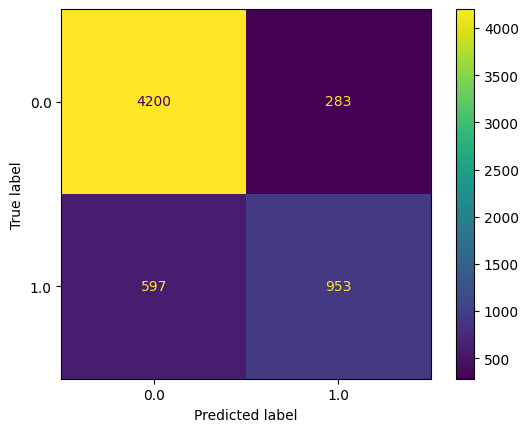

In [ ]:
y_pred = CS_dec_tree.predict(X_test_std)

show_metrics(y_test, y_pred)

#### **Conclusion**

After optimization we got **f1_score = 68.4%**, which is somewhat of an improvement from the previous **f1_score = 61.7%** we achieved with the default parameters.